In [1]:
import pandas as pd
import numpy as np
import random
import sklearn
from sklearn.impute import SimpleImputer
import seaborn as sb
from scipy import stats
from sklearn.ensemble import IsolationForest
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import KNNImputer
from xgboost import XGBRegressor

In [2]:
X = pd.read_csv("X_train.csv",
                delimiter=',',
                index_col = 'id')
X.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,...,x792,x793,x794,x795,x796,x797,x798,x799,x800,x801,x802,x803,x804,x805,x806,x807,x808,x809,x810,x811,x812,x813,x814,x815,x816,x817,x818,x819,x820,x821,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,14168.823171,10514.380717,3316.149698,94230.695124,102.386606,92.677127,11108.748199,10866.505510,10837.622093,10.227734,NaN,1.111814e+06,10.831701,1027.187445,10.768667,200934.427718,95.995477,93.568065,2.816360,11.064557,1046.159199,2.275955,103.930858,2.823225,NaN,1075.637477,5732.008924,8945.065857,103.494939,1665.073010,1.063629e+06,105413.634226,102.123333,721135.252561,771.771796,7.157959e+05,9.564674,96.276546,10.073280,NaN,...,1003.020608,1.041528e+06,1183.899881,1038.755442,NaN,1050.010826,1.048384e+06,10318.259590,10650.542327,2.305030,1.024428e+06,292500.225170,101.991971,1094.832244,104.990902,100.330463,368045.091954,95.013096,10.192720,834679.582361,1.114575e+06,1.008652e+06,103625.818325,896963.282502,100508.678075,2.588126,11539.145654,8.965285e+05,83148.312892,114.992221,NaN,12352.094085,846.014651,105.132144,102.112809,2090.004260,2.691845,1234.374109,1000.784475,9285.751272
1.0,17757.037554,NaN,4101.016273,92959.527633,NaN,99.855168,10013.959449,10826.607494,10076.101597,11.436970,93597.905770,9.488973e+05,10.943224,951.089936,10.197258,293114.254155,82.207275,103.255382,2.667390,10.353872,1002.566342,2.779402,106.461593,2.677011,10.175415,1062.056651,7633.084216,10407.086185,107.001217,2115.015631,1.057646e+06,109303.907332,107.476438,721135.262969,1047.227677,1.002039e+06,11.260237,111.542624,9.812518,1.048100e+06,...,1032.377687,1.090152e+06,890.797126,1018.325933,130.834816,1013.089415,NaN,10484.749796,10951.348303,2.384952,9.193941e+05,NaN,106.051431,916.835853,105.744668,117.771373,368045.072972,92.783642,11.039017,NaN,9.463185e+05,1.019830e+06,104665.502806,NaN,106190.654474,2.417485,11414.297515,1.130026e+06,99342.991894,94.640370,NaN,16198.071494,776.084467,106.385590,103.472030,2474.051881,2.287976,NaN,1012.626705,11750.284764
2.0,14226.656663,11029.642499,NaN,124055.600561,100.542483,92.860892,NaN,10492.342868,NaN,10.810076,95465.411441,1.110279e+06,10.616625,1087.456514,10.088723,182743.711172,104.776176,90.907810,2.603299,10.956751,1033.501885,2.384827,108.364555,2.702694,7.776831,1005.910004,5000.020244,8063.053692,105.614510,1985.045559,1.037929e+06,105646.119303,NaN,721135.290823,826.764202,8.937658e+05,10.137402,NaN,11.055613,1.044127e+06,...,1094.672237,1.020574e+06,982.439165,1029.603846,81.967222,1092.561411,1.074025e+06,NaN,10277.674469,2.477187,1.077736e+06,292500.218658,105.049175,1026.939802,110.015870,101.972008,NaN,84.578243,10.358684,966326.668055,8.952268e+05,9.370845e+05,108296.518504,896963.308492,97784.789233,2.476064,9680.811452,8.268902e+05,NaN,105.702576,10329.704431,13976.063780,737.040332,103.671234,109.458246,2656.083281,2.843706,888.353607,1048.810385,9553.922728
3.0,8766.012436,7384.202998,2147.308418,100157.719990,104.855061,101.929026,10050.049932,10499.521099,10525.030989,10.092109,97849.596135,9.875520e+05,NaN,1005.598927,10.573814,104709.047665,102.775399,100.198365,2.576241,10.593228,1046.391246,2.419814,104.984552,2.329664,9.935822,1051.995795,1769.735524,3410.609525,104.795478,NaN,1.045797e+06,105415.037552,104.608992,721135.286277,1003.924436,9.727745e+05,9.988600,100.471164,10.239728,1.049569e+06,...,1051.751346,1.046895e+06,977.324732,1048.714968,NaN,1054.662613,1.045646e+06,10527.180210,NaN,2.112389,1.004163e+06,292500.278847,104.982316,980.374121,104.657864,100.008794,368045.103132,NaN,10.639746,972273.461247,NaN,1.016526e+06,104911.451781,896963.234850,100394.630503,2.040717,10005.165019,4.888921e+05,98950.429732,NaN,10008.251395,6212.127347,329.044233,105.084488,104.858546,1097.785204,2.732257,927.752967,1048.357330,NaN

In [3]:
y = pd.read_csv("y_train.csv",
                delimiter=',',
                index_col='id')
# y = pd.Series(y).reset_index()
y.head()

,y
id,
0.0,74.0
1.0,51.0
2.0,70.0
3.0,52.0
4.0,85.0


In [4]:
# find out how many missing values we have for each observation (for each row)
print(f"Sum of NaN values for each feature is:\n{np.isnan(X).sum(axis=0)}")
print(f"\n\nThe shape of X is: {X.shape}")
# for each feature
# print(f"\n\nSum of NaN values for each observation is:\n{np.isnan(X).sum(axis=1)}")

Sum of NaN values for each feature is:
x0       91
x1       84
x2       88
x3       91
x4       74
       ... 
x827    101
x828     95
x829     92
x830     80
x831     96
Length: 832, dtype: int64


The shape of X is: (1212, 832)


In [5]:
# find the index of the observation with NaN
nan_idx = np.isnan(X)
nan_idx[0:10]

/tmp/ipykernel_687/1291900530.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  nan_idx[0:10]


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,...,x792,x793,x794,x795,x796,x797,x798,x799,x800,x801,x802,x803,x804,x805,x806,x807,x808,x809,x810,x811,x812,x813,x814,x815,x816,x817,x818,x819,x820,x821,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1.0,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
2.0,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3.0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
4.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False
5.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6.0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
7.0,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [6]:
# find row index of NaN values for third column, feature x2
# np.where(np.isnan(X.iloc[:,2])==True)

In [7]:
X.median()

x0       15048.467618
x1       10839.483074
x2        3401.539562
x3      100053.800306
x4         105.029940
            ...      
x827      2459.092168
x828         2.710103
x829      1362.350726
x830      1053.778881
x831      9981.210986
Length: 832, dtype: float64

In [8]:
X.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,...,x792,x793,x794,x795,x796,x797,x798,x799,x800,x801,x802,x803,x804,x805,x806,x807,x808,x809,x810,x811,x812,x813,x814,x815,x816,x817,x818,x819,x820,x821,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,14168.823171,10514.380717,3316.149698,94230.695124,102.386606,92.677127,11108.748199,10866.505510,10837.622093,10.227734,NaN,1.111814e+06,10.831701,1027.187445,10.768667,200934.427718,95.995477,93.568065,2.816360,11.064557,1046.159199,2.275955,103.930858,2.823225,NaN,1075.637477,5732.008924,8945.065857,103.494939,1665.073010,1.063629e+06,105413.634226,102.123333,721135.252561,771.771796,7.157959e+05,9.564674,96.276546,10.073280,NaN,...,1003.020608,1.041528e+06,1183.899881,1038.755442,NaN,1050.010826,1.048384e+06,10318.259590,10650.542327,2.305030,1.024428e+06,292500.225170,101.991971,1094.832244,104.990902,100.330463,368045.091954,95.013096,10.192720,834679.582361,1.114575e+06,1.008652e+06,103625.818325,896963.282502,100508.678075,2.588126,11539.145654,8.965285e+05,83148.312892,114.992221,NaN,12352.094085,846.014651,105.132144,102.112809,2090.004260,2.691845,1234.374109,1000.784475,9285.751272
1.0,17757.037554,NaN,4101.016273,92959.527633,NaN,99.855168,10013.959449,10826.607494,10076.101597,11.436970,93597.905770,9.488973e+05,10.943224,951.089936,10.197258,293114.254155,82.207275,103.255382,2.667390,10.353872,1002.566342,2.779402,106.461593,2.677011,10.175415,1062.056651,7633.084216,10407.086185,107.001217,2115.015631,1.057646e+06,109303.907332,107.476438,721135.262969,1047.227677,1.002039e+06,11.260237,111.542624,9.812518,1.048100e+06,...,1032.377687,1.090152e+06,890.797126,1018.325933,130.834816,1013.089415,NaN,10484.749796,10951.348303,2.384952,9.193941e+05,NaN,106.051431,916.835853,105.744668,117.771373,368045.072972,92.783642,11.039017,NaN,9.463185e+05,1.019830e+06,104665.502806,NaN,106190.654474,2.417485,11414.297515,1.130026e+06,99342.991894,94.640370,NaN,16198.071494,776.084467,106.385590,103.472030,2474.051881,2.287976,NaN,1012.626705,11750.284764
2.0,14226.656663,11029.642499,NaN,124055.600561,100.542483,92.860892,NaN,10492.342868,NaN,10.810076,95465.411441,1.110279e+06,10.616625,1087.456514,10.088723,182743.711172,104.776176,90.907810,2.603299,10.956751,1033.501885,2.384827,108.364555,2.702694,7.776831,1005.910004,5000.020244,8063.053692,105.614510,1985.045559,1.037929e+06,105646.119303,NaN,721135.290823,826.764202,8.937658e+05,10.137402,NaN,11.055613,1.044127e+06,...,1094.672237,1.020574e+06,982.439165,1029.603846,81.967222,1092.561411,1.074025e+06,NaN,10277.674469,2.477187,1.077736e+06,292500.218658,105.049175,1026.939802,110.015870,101.972008,NaN,84.578243,10.358684,966326.668055,8.952268e+05,9.370845e+05,108296.518504,896963.308492,97784.789233,2.476064,9680.811452,8.268902e+05,NaN,105.702576,10329.704431,13976.063780,737.040332,103.671234,109.458246,2656.083281,2.843706,888.353607,1048.810385,9553.922728
3.0,8766.012436,7384.202998,2147.308418,100157.719990,104.855061,101.929026,10050.049932,10499.521099,10525.030989,10.092109,97849.596135,9.875520e+05,NaN,1005.598927,10.573814,104709.047665,102.775399,100.198365,2.576241,10.593228,1046.391246,2.419814,104.984552,2.329664,9.935822,1051.995795,1769.735524,3410.609525,104.795478,NaN,1.045797e+06,105415.037552,104.608992,721135.286277,1003.924436,9.727745e+05,9.988600,100.471164,10.239728,1.049569e+06,...,1051.751346,1.046895e+06,977.324732,1048.714968,NaN,1054.662613,1.045646e+06,10527.180210,NaN,2.112389,1.004163e+06,292500.278847,104.982316,980.374121,104.657864,100.008794,368045.103132,NaN,10.639746,972273.461247,NaN,1.016526e+06,104911.451781,896963.234850,100394.630503,2.040717,10005.165019,4.888921e+05,98950.429732,NaN,10008.251395,6212.127347,329.044233,105.084488,104.858546,1097.785204,2.732257,927.752967,1048.357330,NaN

In [9]:
# impute NaN with random numbers
X_rand_impute = X.copy()
for col in X_rand_impute.columns:
    # data = X_rand_impute[col]
    mask = X_rand_impute[col].isnull()
    samples = random.choices(X_rand_impute[col][~mask].values, k = mask.sum())
    X_rand_impute[col][mask] = samples
    # return X_rand_impute


In [10]:
X_rand_impute.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,...,x792,x793,x794,x795,x796,x797,x798,x799,x800,x801,x802,x803,x804,x805,x806,x807,x808,x809,x810,x811,x812,x813,x814,x815,x816,x817,x818,x819,x820,x821,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,14168.823171,10514.380717,3316.149698,94230.695124,102.386606,92.677127,11108.748199,10866.505510,10837.622093,10.227734,102445.757626,1.111814e+06,10.831701,1027.187445,10.768667,200934.427718,95.995477,93.568065,2.816360,11.064557,1046.159199,2.275955,103.930858,2.823225,9.713077,1075.637477,5732.008924,8945.065857,103.494939,1665.073010,1.063629e+06,105413.634226,102.123333,721135.252561,771.771796,7.157959e+05,9.564674,96.276546,10.073280,1.098688e+06,...,1003.020608,1.041528e+06,1183.899881,1038.755442,37.068932,1050.010826,1.048384e+06,10318.259590,10650.542327,2.305030,1.024428e+06,292500.225170,101.991971,1094.832244,104.990902,100.330463,368045.091954,95.013096,10.192720,8.346796e+05,1.114575e+06,1.008652e+06,103625.818325,896963.282502,100508.678075,2.588126,11539.145654,8.965285e+05,83148.312892,114.992221,9082.835681,12352.094085,846.014651,105.132144,102.112809,2090.004260,2.691845,1234.374109,1000.784475,9285.751272
1.0,17757.037554,12520.317565,4101.016273,92959.527633,108.578937,99.855168,10013.959449,10826.607494,10076.101597,11.436970,93597.905770,9.488973e+05,10.943224,951.089936,10.197258,293114.254155,82.207275,103.255382,2.667390,10.353872,1002.566342,2.779402,106.461593,2.677011,10.175415,1062.056651,7633.084216,10407.086185,107.001217,2115.015631,1.057646e+06,109303.907332,107.476438,721135.262969,1047.227677,1.002039e+06,11.260237,111.542624,9.812518,1.048100e+06,...,1032.377687,1.090152e+06,890.797126,1018.325933,130.834816,1013.089415,1.017539e+06,10484.749796,10951.348303,2.384952,9.193941e+05,292500.250676,106.051431,916.835853,105.744668,117.771373,368045.072972,92.783642,11.039017,1.365690e+06,9.463185e+05,1.019830e+06,104665.502806,896963.305274,106190.654474,2.417485,11414.297515,1.130026e+06,99342.991894,94.640370,9808.721441,16198.071494,776.084467,106.385590,103.472030,2474.051881,2.287976,1424.675499,1012.626705,11750.284764
2.0,14226.656663,11029.642499,4049.520070,124055.600561,100.542483,92.860892,11470.980563,10492.342868,10525.762878,10.810076,95465.411441,1.110279e+06,10.616625,1087.456514,10.088723,182743.711172,104.776176,90.907810,2.603299,10.956751,1033.501885,2.384827,108.364555,2.702694,7.776831,1005.910004,5000.020244,8063.053692,105.614510,1985.045559,1.037929e+06,105646.119303,107.569815,721135.290823,826.764202,8.937658e+05,10.137402,89.281328,11.055613,1.044127e+06,...,1094.672237,1.020574e+06,982.439165,1029.603846,81.967222,1092.561411,1.074025e+06,10882.339717,10277.674469,2.477187,1.077736e+06,292500.218658,105.049175,1026.939802,110.015870,101.972008,368045.116335,84.578243,10.358684,9.663267e+05,8.952268e+05,9.370845e+05,108296.518504,896963.308492,97784.789233,2.476064,9680.811452,8.268902e+05,93479.766747,105.702576,10329.704431,13976.063780,737.040332,103.671234,109.458246,2656.083281,2.843706,888.353607,1048.810385,9553.922728
3.0,8766.012436,7384.202998,2147.308418,100157.719990,104.855061,101.929026,10050.049932,10499.521099,10525.030989,10.092109,97849.596135,9.875520e+05,10.277340,1005.598927,10.573814,104709.047665,102.775399,100.198365,2.576241,10.593228,1046.391246,2.419814,104.984552,2.329664,9.935822,1051.995795,1769.735524,3410.609525,104.795478,1522.058079,1.045797e+06,105415.037552,104.608992,721135.286277,1003.924436,9.727745e+05,9.988600,100.471164,10.239728,1.049569e+06,...,1051.751346,1.046895e+06,977.324732,1048.714968,61.475015,1054.662613,1.045646e+06,10527.180210,10801.744500,2.112389,1.004163e+06,292500.278847,104.982316,980.374121,104.657864,100.008794,368045.103132,118.115857,10.639746,9.722735e+05,1.091123

In [11]:
# for feature in X_rand_impute.columns:
        
#     deter_data["Det" + feature] = X_rand_impute[feature]
#     parameters = list(set(X_rand_impute.columns) - set(missing_columns) - {feature + '_imp'})
    
#     #Create a Linear Regression model to estimate the missing data
#     model = linear_model.LinearRegression()
#     model.fit(X = X_rand_impute[feature], y = X_rand_impute[feature])
    
#     #observe that I preserve the index of the missing data from the original dataframe
#     deter_data.loc[df[feature].isnull(), "Det" + feature] = model.predict(df[parameters])[df[feature].isnull()]

In [12]:
X_imp = X_rand_impute

In [13]:
# manual imputation
X_man_imp = X.fillna(X.median())
type(X_man_imp)

pandas.core.frame.DataFrame

In [14]:
X_median = SimpleImputer(missing_values=np.nan, strategy='median')
# find the median of dataset X
X_median.fit(X)
X_imp = X_median.transform(X)
type(X_imp)
# X_imp = SimpleImputer(missing_values=np.nan, strategy='median').fit(X).transform(X)

numpy.ndarray

In [15]:
print(f"{X_imp[1,2]:.12f}")
print(f"{X_man_imp.iloc[1,2]:.12f}")

4101.016272640000
4101.016272640000


<Axes: >

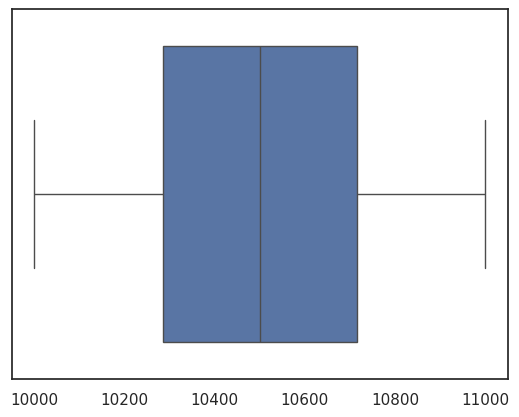

In [16]:
sb.set_theme(style='white')
sb.boxplot(x=X_imp[:,252])

<Axes: ylabel='y'>

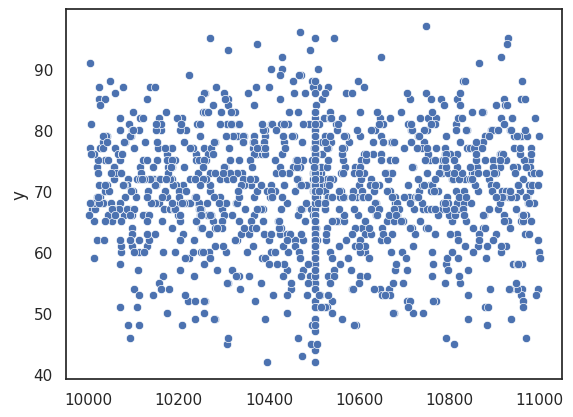

In [17]:
sb.scatterplot(x=X_imp[:,252],y=y.iloc[:,0])

In [18]:
z = np.abs(stats.zscore(X_imp))
print(z)

[[0.46669013 0.28261843 0.26366489 ... 0.49335489 1.82990685 0.71460557]
 [1.14554814 0.06800054 1.57482779 ... 0.00858807 1.40971744 1.81819821]
 [0.44070468 0.05753412 0.06364537 ... 1.85049779 0.12583773 0.43900547]
 ...
 [0.42360795 1.10185404 0.35647932 ... 1.65372824 0.49755989 0.34598831]
 [0.13498147 0.00386419 0.63138356 ... 0.23447142 0.10597986 0.91970535]
 [0.10402734 0.3359266  0.75248105 ... 0.22222339 1.27589736 0.38851614]]


In [19]:
print(np.where(z > 3))

(array([   0,    0,    1, ..., 1210, 1211, 1211]), array([160, 400, 742, ..., 159, 113, 590]))


In [20]:
print(X_imp[0,252])
print(np.median(X_imp[:,252]))

10176.2924356
10501.08312347


In [21]:
print(type(X_imp))
print(type(X_man_imp))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [22]:
# standardize the data set
# sklearn.preprocessing.StandardScaler().fit(X_imp)
X_std_mean = sklearn.preprocessing.StandardScaler().fit(X_imp).mean_
print(X_std_mean[0:10])

[1.52074936e+04 1.09424900e+04 3.42871026e+03 1.00006149e+05
 1.05067890e+02 9.99494163e+01 9.98369183e+03 1.04964241e+04
 1.04957253e+04 9.98461231e+00]


In [23]:

X_stdised = sklearn.preprocessing.StandardScaler().fit(X_imp).transform(X_imp)
print(X_imp[0:3,0:3])
print(X_stdised[0:3,0:3])

[[14168.82317114 10514.38071711  3316.14969762]
 [17757.03755367 10839.48307422  4101.01627264]
 [14226.65666261 11029.64249883  3401.53956164]]
[[-0.46669013 -0.28261843 -0.26366489]
 [ 1.14554814 -0.06800054  1.57482779]
 [-0.44070468  0.05753412 -0.06364537]]


In [24]:
print(np.mean(X_imp[:,0]))
print(X_imp[0,0])

15207.493620246427
14168.82317114


In [25]:
model = sklearn.ensemble.IsolationForest(max_samples=200,
                                         contamination=0.025,
                                         max_features=len(X_stdised[0]))
model.fit(X_stdised)
outl_pred = model.predict(X_stdised)
mask = outl_pred != -1
# print(outl_pred)
# print(np.sum(mask))

In [26]:
# np.where(outl_pred != 1)
X_cleaned = np.copy(X_stdised)
y_cleaned = np.copy(y.values)


# new_df_with_col_names = pd.DataFrame(data=no_col_names_df.values, columns=col_names_df.columns)



#standardies X and y, free of outliers:
X_cleaned, y_cleaned = X_cleaned[mask,:], y_cleaned[mask]
print(X_cleaned.shape, y_cleaned.shape)
y_cleaned[0:10]

(1181, 832) (1181, 1)


array([[74.],
       [51.],
       [70.],
       [52.],
       [85.],
       [59.],
       [82.],
       [72.],
       [73.],
       [56.]])

In [27]:
nan_idx_cleaned = nan_idx.iloc[mask,:]
nan_idx_cleaned.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,...,x792,x793,x794,x795,x796,x797,x798,x799,x800,x801,x802,x803,x804,x805,x806,x807,x808,x809,x810,x811,x812,x813,x814,x815,x816,x817,x818,x819,x820,x821,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1.0,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
2.0,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3.0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
4.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False


In [28]:
X_cleaned[nan_idx_cleaned] = np.nan

In [29]:
imputer = KNNImputer(n_neighbors=20)
X_imp_KNN = imputer.fit_transform(X_cleaned)

In [30]:
X_cleaned = X_imp_KNN

In [31]:
df = pd.concat([pd.DataFrame(X_cleaned,columns=X.columns,index=nan_idx_cleaned.index),pd.DataFrame(y_cleaned,columns=y.columns,index=nan_idx_cleaned.index)],axis=1)
# df = pd.concat([pd.DataFrame(X_cleaned),pd.DataFrame(y_cleaned)],axis=1)
df.columns = [*df.columns[:-1], 'y']
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,...,x793,x794,x795,x796,x797,x798,x799,x800,x801,x802,x803,x804,x805,x806,x807,x808,x809,x810,x811,x812,x813,x814,x815,x816,x817,x818,x819,x820,x821,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831,y
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,-0.466690,-0.282618,-0.263665,-0.618864,-0.976612,-0.786602,1.195982,1.385506,1.227129,0.253626,0.422616,1.108402,1.010466,0.279846,0.813985,-0.352791,-0.479540,-0.719811,0.667911,1.913823,-0.120207,-1.130342,-0.441740,0.582204,-0.140379,0.940866,0.542474,0.171962,-0.538553,-0.679479,0.486240,0.156823,-1.071137,-0.208678,-2.464140,-2.946747,-0.440861,-0.422074,0.045157,-0.026181,...,-0.296399,1.932449,-0.407911,-0.353161,-0.001462,-0.089036,-0.666066,0.559868,-0.442180,0.260070,-0.215936,-1.060780,1.054507,0.029427,0.043520,-0.926562,-0.590843,-1.310350,-1.777021,1.169603,0.127853,-0.521892,0.209366,0.074959,0.891015,1.652983,-0.214305,-1.743966,1.611021,0.129799,-0.439093,0.203576,0.060724,-1.100703,-0.780246,-0.128824,-0.493355,-1.829907,-0.714606,74.0
1.0,1.145548,1.248109,1.574828,-0.755075,0.116070,-0.010194,0.032176,1.236136,-1.506105,1.515109,-0.696673,-0.572713,1.417220,-0.533553,-1.278828,2.354664,-1.954823,0.342636,0.084800,-0.753226,-1.721846,1.394214,0.504197,-0.139743,0.146848,0.438638,2.249706,1.109697,0.726142,0.626375,0.263127,1.567215,0.906880,0.169633,0.486065,0.064614,1.283155,1.214032,-0.230418,-0.074268,...,1.492130,-1.153909,-1.171185,0.470611,-1.379993,0.029583,-0.054783,1.663143,0.046549,-0.813151,0.057138,0.362877,-0.836166,0.315233,1.895187,-1.613930,-0.834730,1.738414,0.247843,-0.603277,0.247552,-0.139648,-0.125771,0.660530,-0.012641,1.522656,1.774027,-0.068818,-0.585212,0.116311,1.406965,-0.199857,0.526490,-0.594855,-0.013314,-1.725024,0.676773,-1.409717,1.818198,51.0
2.0,-0.440705,0.057534,-0.461106,2.577001,-1.648303,-0.766725,0.230170,-0.015279,0.105564,0.861130,-0.496662,1.092562,0.226026,0.924057,-1.676343,-0.887079,0.459961,-1.011572,-0.166074,1.509250,-0.585247,-0.584400,1.215485,-0.012932,-2.319785,-1.637701,-0.114878,-0.393758,0.225965,0.249167,-0.472182,0.241109,-0.260467,1.182057,-1.875156,-1.074453,0.141479,-0.204142,1.083292,-0.224383,...,-1.067155,-0.188923,-0.749827,-0.412329,1.587246,0.871293,-0.046927,-0.807710,0.610577,0.804762,-0.447078,0.011385,0.333355,1.934744,0.217800,0.130255,-1.732344,-0.712468,-0.400072,-1.141619,-0.638502,1.195310,1.143113,-0.205759,0.297571,-0.286901,-0.807306,0.055269,0.608546,0.281152,0.340408,-0.425105,-0.482133,1.632975,0.350198,0.471372,-1.850498,-0.125838,-0.439005,70.0
3.0,-2.894254,-2.349020,-3.001590,0.016241,-0.077519,0.214123,0.070541,0.011594,0.105183,0.112141,-0.241315,-0.173840,-0.000022,0.049089,0.100328,-3.179070,0.245885,0.007360,-0.271985,0.145025,-0.111681,-0.408956,-0.047891,-1.854807,-0.099542,0.066581,-3.015786,-3.377822,-0.069456,-1.927640,-0.178759,0.157331,-0.152665,1.016828,0.022276,-0.243260,-0.009821,0.027474,0.221060,-0.018790,...,-0.099002,-0.242778,-0.035810,-0.349844,0.172222,-0.191578,0.101004,0.084623,-1.620192,0.053003,1.689521,-0.012063,-0.161264,-0.096851,0.009369,-0.521760,-0.050452,0.300049,-0.337872,0.017850,0.212167,-0.049224,-1.502676,0.063205,-2.007882,0.051686,-3.685510,-0.109424,0.197432,-0.065329,-3.386258,-2.778864,0.043016,-0.078849,-2.761680,0.030894,-1.695968,-0.141913,0.011813,52.0
4.0,-0.631951,1.536183,-0.047770,-0.852693,-0.476465,-0.449983,-0.336280,0.952266,0.441740,2.109532,-0.277017,0.699040,0.284799,-1.621477,1.394965,-0.436188,0.557310,0.331466,0.004423,-0.774769,0.929329,1.131504,-1.494751,-0.286695,0.077622,-1.720029,-0.285258,-0.160921,0.452867,2.324257,-0.857346,0.025065,0.059522,1.713522,0.300221,-0.985454,1.149685,1.477878,-0.095072,1.178458,...,-0.137702,-1.020055,-0.331565,1.620748,-0.650169,0.661138,-1.118894,0.683205,-0.697758,-0.008849,0.804725,1.486497,

In [32]:
corr = np.abs(df.corrwith(df["y"],method='spearman'))
# np.max(corr[0:-1])
# print(corr)

# features we want to drop
# corrcoef = np.where(corr < 0.1)[0]
corrcoef = corr < 0.1
# len(corrcoef[0])
print(corrcoef)

/home/linuxbrew/.linuxbrew/Cellar/python@3.11/3.11.5/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


x0       True
x1       True
x2      False
x3       True
x4       True
        ...  
x828     True
x829     True
x830     True
x831     True
y       False
Length: 833, dtype: bool


In [33]:
columnnames = np.array(X.columns)
columnnames = columnnames[np.where(corr < 0.1)]
print(columnnames)

['x0' 'x1' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12' 'x13'
 'x14' 'x16' 'x17' 'x19' 'x20' 'x22' 'x24' 'x25' 'x28' 'x30' 'x31' 'x32'
 'x33' 'x34' 'x35' 'x36' 'x37' 'x38' 'x39' 'x41' 'x42' 'x43' 'x44' 'x45'
 'x46' 'x47' 'x48' 'x49' 'x50' 'x51' 'x52' 'x53' 'x54' 'x55' 'x56' 'x57'
 'x58' 'x59' 'x60' 'x61' 'x62' 'x63' 'x64' 'x65' 'x66' 'x67' 'x68' 'x70'
 'x71' 'x72' 'x73' 'x74' 'x75' 'x76' 'x78' 'x79' 'x80' 'x81' 'x82' 'x83'
 'x84' 'x85' 'x86' 'x88' 'x90' 'x91' 'x92' 'x93' 'x94' 'x95' 'x96' 'x97'
 'x99' 'x102' 'x103' 'x105' 'x106' 'x108' 'x109' 'x110' 'x111' 'x112'
 'x116' 'x117' 'x118' 'x119' 'x120' 'x121' 'x122' 'x123' 'x124' 'x125'
 'x126' 'x127' 'x128' 'x130' 'x131' 'x134' 'x135' 'x136' 'x137' 'x138'
 'x139' 'x140' 'x142' 'x143' 'x145' 'x147' 'x149' 'x150' 'x152' 'x153'
 'x154' 'x155' 'x156' 'x157' 'x158' 'x160' 'x161' 'x162' 'x163' 'x164'
 'x165' 'x166' 'x167' 'x168' 'x170' 'x171' 'x175' 'x176' 'x178' 'x179'
 'x180' 'x181' 'x182' 'x183' 'x184' 'x185' 'x186' 'x187' 'x188' 'x1

In [34]:
df_new = df.drop(columns=columnnames)
df_new.head()

,x2,x15,x18,x21,x23,x26,x27,x29,x40,x69,x77,x87,x89,x98,x100,x101,x104,x107,x113,x114,x115,x129,x132,x133,x141,x144,x146,x148,x151,x159,x169,x172,x173,x174,x177,x193,x194,x200,x202,x203,...,x672,x675,x677,x681,x690,x696,x702,x703,x711,x712,x713,x715,x720,x721,x725,x726,x727,x731,x734,x742,x745,x748,x759,x766,x768,x769,x773,x774,x777,x778,x780,x788,x790,x796,x801,x817,x819,x823,x824,y
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,-0.263665,-0.352791,0.667911,-1.130342,0.582204,0.542474,0.171962,-0.679479,0.497451,-0.513600,0.374159,0.424765,-0.577024,-0.957677,0.208944,-1.046189,0.0,-0.351031,0.079566,0.679279,1.235475,0.0,0.317283,-0.255890,-1.097506,-0.574248,1.106273,-0.556954,0.463389,1.061607,0.138825,1.257059,-0.219613,0.677022,-1.118454,-0.743601,0.142697,0.790433,-0.401379,-0.255939,...,-0.599531,-0.501308,0.348267,-1.004612,-0.465457,0.216032,0.900625,-1.522960,-0.501105,1.153966,-0.867031,-0.596340,-0.395278,0.708613,-0.541906,-0.190486,-0.589296,-0.547622,0.656483,-0.355570,0.061663,1.102591,-0.276223,0.243936,-0.565694,0.300886,-0.326969,-0.255522,0.267994,-0.316157,0.021611,-0.268493,0.528805,-0.353161,-0.442180,0.891015,-0.214305,-0.439093,0.203576,74.0
1.0,1.574828,2.354664,0.084800,1.394214,-0.139743,2.249706,1.109697,0.626375,-1.438344,1.492241,0.379036,1.513699,1.136601,0.322539,0.993560,1.611634,0.0,1.087961,1.073174,2.009499,-0.482804,0.0,-2.346946,0.916662,1.322112,0.792636,1.111472,1.316961,-1.350522,-0.816719,1.911136,0.916909,-0.316113,-0.945350,2.580253,2.583830,0.085201,0.100415,1.527321,1.497698,...,-0.274174,1.474519,0.791746,-0.088572,0.666986,1.737925,-0.431592,1.049087,1.098276,1.147966,1.655472,1.188243,2.406886,0.168521,-0.203881,2.273111,1.294706,1.454315,0.441482,3.852168,0.828541,0.285446,1.754724,1.258571,1.529911,-1.252485,1.704049,2.129016,0.396224,1.459110,-2.334900,0.614893,-1.390669,0.470611,0.046549,-0.012641,1.774027,1.406965,-0.199857,51.0
2.0,-0.461106,-0.887079,-0.166074,-0.584400,-0.012932,-0.114878,-0.393758,0.249167,0.357744,-0.387105,0.396540,0.285798,-0.140631,0.349806,-1.040437,-0.000082,0.0,0.680285,-0.931425,-1.482306,-0.443834,0.0,0.961738,0.312344,-0.811716,0.899161,0.178644,-0.666359,0.323773,-0.283550,-1.038033,0.307511,0.870615,0.227801,-0.702957,-0.024488,0.433318,-0.156531,-0.676138,-0.484996,...,1.425864,-0.321313,-0.046653,0.078350,0.874815,0.156177,-0.456412,-0.081031,-0.274462,0.114304,0.034451,-0.650637,-0.259181,0.504977,0.477426,-1.158948,-0.569209,-0.624840,1.015071,-0.484394,-0.092260,-0.071335,-0.725513,0.389851,-0.887543,0.306675,0.006649,-0.347207,0.082551,0.556741,1.195040,0.122809,0.595696,-0.412329,0.610577,0.297571,-0.807306,0.340408,-0.425105,70.0
3.0,-3.001590,-3.179070,-0.271985,-0.408956,-1.854807,-3.015786,-3.377822,-1.927640,3.932501,-3.984788,-3.035211,-3.382485,-3.370677,-3.267060,-1.949501,-3.298573,0.0,-1.742636,-2.174331,-1.237298,1.177047,0.0,3.266615,-3.030026,-2.949710,-1.093706,-0.778590,-3.344768,3.914359,0.797916,-2.916674,-1.962512,1.198935,3.556741,-3.653134,-2.426204,-2.376407,-2.022949,-3.352986,-2.628220,...,-1.773471,-3.101921,0.556406,-1.602698,-1.865908,-1.238338,0.682847,-3.019921,-2.105575,-1.968436,-3.376881,-3.470411,-1.918066,-1.514917,-2.122730,-2.570169,-3.466501,-3.258378,-1.981483,-0.904255,-1.524533,-2.105025,-3.423633,-2.037789,-3.294933,-1.727428,-3.415461,-2.788313,-1.462045,-2.795005,2.983213,-2.951829,3.369497,-0.349844,-1.620192,-2.007882,-3.685510,-3.386258,-2.778864,52.0
4.0,-0.047770,-0.436188,0.004423,1.131504,-0.286695,-0.285258,-0.160921,2.324257,-0.073211,0.077583,-0.830465,-0.125388,-1.295181,1.024676,0.734400,0.090021,0.0,-0.097013,-0.044114,1.298414,0.228420,0.0,0.360557,0.277817,-1.077950,-0.065523,0.054622,-0.429538,-0.094781,-0.231437,0.239680,0.038768,0.195134,-0.197579,-0.506553,-0.825079,0.300015,-0.724605,-0.057072,-1.007775,...,-0.245499,0.076863,-0.128061,0.448987,0.244583,0.341748,0.697005,-0.964891,-0.033389,-0.256423,-0.483910,-0.203649,0.687353,0.

In [35]:
cor_mat = df_new.corr()
print(cor_mat.iloc[0:5][0:5])

           x2       x15       x18  ...      x823      x824         y
x2   1.000000  0.745417 -0.070477  ...  0.614710  0.478325 -0.253763
x15  0.745417  1.000000 -0.191031  ...  0.718437  0.530522 -0.207465
x18 -0.070477 -0.191031  1.000000  ...  0.054328  0.036602 -0.120137
x21 -0.048234 -0.178884  0.364873  ...  0.031856  0.015662 -0.181529
x23  0.214154  0.070272  0.375494  ...  0.325324  0.235508 -0.360018

[5 rows x 203 columns]


In [36]:
X_train = df_new.drop(columns='y')
y_train = df_new['y']

In [37]:
X_test = pd.read_csv('X_test.csv',
                     delimiter=',',
                     index_col='id')
X_test.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,...,x792,x793,x794,x795,x796,x797,x798,x799,x800,x801,x802,x803,x804,x805,x806,x807,x808,x809,x810,x811,x812,x813,x814,x815,x816,x817,x818,x819,x820,x821,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,14655.540585,9917.388635,3368.691863,104367.124458,104.132894,95.412138,9222.286185,NaN,10054.751221,8.735165,90302.375409,1.114273e+06,10.276756,1186.458006,10.641022,209452.331515,96.811898,98.456132,2.799671,10.627653,1002.684169,2.692255,107.860359,2.693783,9.790039,1082.693921,5416.080050,9387.050569,101.219022,1741.056271,1.013536e+06,102823.479390,103.458544,721135.225826,980.477561,NaN,9.815716,96.847696,10.630457,1.020917e+06,...,1047.950515,1.044854e+06,980.653863,1069.192707,76.004622,1082.309028,1.097756e+06,10205.146644,10454.921188,2.377493,9.754610e+05,292500.271205,NaN,NaN,109.797735,92.553879,368045.069263,98.027756,NaN,9.838720e+05,9.226025e+05,9.356067e+05,105006.459953,896963.237377,115422.750647,2.440736,10469.468813,9.132602e+05,NaN,101.711427,9153.072463,12039.009308,714.005017,105.651509,103.574436,2628.082823,2.766271,1553.285942,1037.998392,9762.400011
1.0,13875.822363,9955.163751,3118.195658,103577.269601,103.290975,86.916779,9625.725002,10592.011548,10234.818476,10.853218,103277.753724,1.079500e+06,10.035726,1126.102130,10.606348,181290.109124,92.366407,106.669188,2.826523,NaN,1092.582390,NaN,107.530469,2.659169,12.377428,1094.579482,4173.015532,8318.043806,100.991771,1834.009471,1.040867e+06,NaN,106.308393,721135.285176,1160.434630,1.073874e+06,9.812040,91.223921,8.714241,1.026369e+06,...,1074.133002,1.092217e+06,925.927681,1043.572888,54.558075,NaN,1.070210e+06,10026.417641,10747.008515,2.625019,9.960364e+05,292500.212827,108.183987,1115.791478,104.229807,105.402994,368045.158858,81.217954,10.304873,9.088374e+05,1.020601e+06,8.477405e+05,108635.329180,896963.298624,96523.803247,2.220438,7742.039191,8.420910e+05,99857.086619,94.289208,9915.292110,12579.041315,695.070183,106.900274,105.241730,2388.096545,NaN,1386.519117,1088.519466,11748.788738
2.0,14807.162495,10682.476988,3335.687716,106647.642610,109.481676,86.476353,9128.693785,10880.979240,10485.268796,10.294348,99111.468499,8.260766e+05,10.520996,1003.051983,10.969239,202883.446963,NaN,109.417359,2.566735,10.368450,1022.790660,2.341268,109.951174,2.580409,9.857073,1070.462874,2678.096003,7804.059446,109.675987,2111.072597,1.005849e+06,105996.396419,NaN,721135.307812,988.445368,1.138141e+06,9.231500,96.637371,10.537925,1.009320e+06,...,1062.759072,1.042025e+06,NaN,1080.345256,74.912225,1084.234471,1.025904e+06,10553.013309,10645.226489,2.137080,8.520157e+05,292500.239437,102.891130,1101.392049,104.011191,88.295871,368045.133382,85.687430,10.622601,1.093551e+06,1.202932e+06,9.474688e+05,109670.905363,896963.270621,95374.734087,2.298878,10269.891701,8.521797e+05,104904.325344,92.672079,9733.845509,11009.075093,663.093857,105.541065,101.875603,2097.004365,2.362592,1204.527342,1067.697534,12487.217965
3.0,12253.667985,9001.609788,2631.482012,91105.570966,108.741037,84.542046,9765.458299,10953.438053,10190.986014,9.159968,111752.745255,9.051981e+05,10.049275,886.197270,10.489892,166323.597210,89.915674,102.956187,2.868425,10.515110,1082.957747,2.512254,NaN,2.589256,11.747705,1049.570888,4083.016412,6003.099929,103.605014,1819.063356,1.046730e+06,100614.363867,103.982772,721135.211365,1053.905191,1.144696e+06,8.596464,109.400657,10.590221,1.024731e+06,...,1059.708469,1.082198e+06,1048.898021,1052.520742,64.632071,1015.592292,1.001702e+06,NaN,10190.965417,2.335798,9.248985e+05,292500.242407,103.608376,996.513088,102.147328,105.558890,368045.158737,117.257731,NaN,1.111152e+06,9.244187e+05,1.094809e+06,107114.471323,896963.276938,100113.624700,2.341103,10233.042869,7.274241e+05,99113.586203,105.462315,11204.016625,9395

In [38]:
X_test_KNN = imputer.fit_transform(X_test)

In [39]:
X_test = pd.DataFrame(X_test_KNN, columns=X_test.columns, index=X_test.index)
X_test.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,...,x792,x793,x794,x795,x796,x797,x798,x799,x800,x801,x802,x803,x804,x805,x806,x807,x808,x809,x810,x811,x812,x813,x814,x815,x816,x817,x818,x819,x820,x821,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,14655.540585,9917.388635,3368.691863,104367.124458,104.132894,95.412138,9222.286185,10576.457020,10054.751221,8.735165,90302.375409,1.114273e+06,10.276756,1186.458006,10.641022,209452.331515,96.811898,98.456132,2.799671,10.627653,1002.684169,2.692255,107.860359,2.693783,9.790039,1082.693921,5416.080050,9387.050569,101.219022,1741.056271,1.013536e+06,102823.479390,103.458544,721135.225826,980.477561,9.631921e+05,9.815716,96.847696,10.630457,1.020917e+06,...,1047.950515,1.044854e+06,980.653863,1069.192707,76.004622,1082.309028,1.097756e+06,10205.146644,10454.921188,2.377493,9.754610e+05,292500.271205,104.841841,1013.530814,109.797735,92.553879,368045.069263,98.027756,10.635658,9.838720e+05,9.226025e+05,9.356067e+05,105006.459953,896963.237377,115422.750647,2.440736,10469.468813,9.132602e+05,102422.503683,101.711427,9153.072463,12039.009308,714.005017,105.651509,103.574436,2628.082823,2.766271,1553.285942,1037.998392,9762.400011
1.0,13875.822363,9955.163751,3118.195658,103577.269601,103.290975,86.916779,9625.725002,10592.011548,10234.818476,10.853218,103277.753724,1.079500e+06,10.035726,1126.102130,10.606348,181290.109124,92.366407,106.669188,2.826523,10.574972,1092.582390,2.560584,107.530469,2.659169,12.377428,1094.579482,4173.015532,8318.043806,100.991771,1834.009471,1.040867e+06,105556.950345,106.308393,721135.285176,1160.434630,1.073874e+06,9.812040,91.223921,8.714241,1.026369e+06,...,1074.133002,1.092217e+06,925.927681,1043.572888,54.558075,1055.117203,1.070210e+06,10026.417641,10747.008515,2.625019,9.960364e+05,292500.212827,108.183987,1115.791478,104.229807,105.402994,368045.158858,81.217954,10.304873,9.088374e+05,1.020601e+06,8.477405e+05,108635.329180,896963.298624,96523.803247,2.220438,7742.039191,8.420910e+05,99857.086619,94.289208,9915.292110,12579.041315,695.070183,106.900274,105.241730,2388.096545,2.734807,1386.519117,1088.519466,11748.788738
2.0,14807.162495,10682.476988,3335.687716,106647.642610,109.481676,86.476353,9128.693785,10880.979240,10485.268796,10.294348,99111.468499,8.260766e+05,10.520996,1003.051983,10.969239,202883.446963,101.289910,109.417359,2.566735,10.368450,1022.790660,2.341268,109.951174,2.580409,9.857073,1070.462874,2678.096003,7804.059446,109.675987,2111.072597,1.005849e+06,105996.396419,105.734552,721135.307812,988.445368,1.138141e+06,9.231500,96.637371,10.537925,1.009320e+06,...,1062.759072,1.042025e+06,1007.031178,1080.345256,74.912225,1084.234471,1.025904e+06,10553.013309,10645.226489,2.137080,8.520157e+05,292500.239437,102.891130,1101.392049,104.011191,88.295871,368045.133382,85.687430,10.622601,1.093551e+06,1.202932e+06,9.474688e+05,109670.905363,896963.270621,95374.734087,2.298878,10269.891701,8.521797e+05,104904.325344,92.672079,9733.845509,11009.075093,663.093857,105.541065,101.875603,2097.004365,2.362592,1204.527342,1067.697534,12487.217965
3.0,12253.667985,9001.609788,2631.482012,91105.570966,108.741037,84.542046,9765.458299,10953.438053,10190.986014,9.159968,111752.745255,9.051981e+05,10.049275,886.197270,10.489892,166323.597210,89.915674,102.956187,2.868425,10.515110,1082.957747,2.512254,104.883657,2.589256,11.747705,1049.570888,4083.016412,6003.099929,103.605014,1819.063356,1.046730e+06,100614.363867,103.982772,721135.211365,1053.905191,1.144696e+06,8.596464,109.400657,10.590221,1.024731e+06,...,1059.708469,1.082198e+06,1048.898021,1052.520742,64.632071,1015.592292,1.001702e+06,10434.330234,10190.965417,2.335798,9.248985e+05,292500.242407,103.608376,996.513088,102.147328,105.558890,368045.158737,117.257731,10.576592,1.111152e+06,9.244187e+05,1.09

In [40]:
# # impute NaN with random numbers
# X_test_rand_impute = X_test.copy()
# for col in X_test_rand_impute.columns:
#     # data = X_rand_impute[col]
#     mask = X_test_rand_impute[col].isnull()
#     samples = random.choices(X_test_rand_impute[col][~mask].values, k = mask.sum())
#     X_test_rand_impute[col][mask] = samples
#     # return X_rand_impute

# X_test_rand_impute.head()

In [41]:
# X_test = X_test_rand_impute

In [42]:
# feature selection
X_test = X_test.drop(columns=columnnames)
X_test.head()

,x2,x15,x18,x21,x23,x26,x27,x29,x40,x69,x77,x87,x89,x98,x100,x101,x104,x107,x113,x114,x115,x129,x132,x133,x141,x144,x146,x148,x151,x159,x169,x172,x173,x174,x177,x193,x194,x200,x202,x203,...,x671,x672,x675,x677,x681,x690,x696,x702,x703,x711,x712,x713,x715,x720,x721,x725,x726,x727,x731,x734,x742,x745,x748,x759,x766,x768,x769,x773,x774,x777,x778,x780,x788,x790,x796,x801,x817,x819,x823,x824
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,3368.691863,209452.331515,2.799671,2.692255,2.693783,5416.080050,9387.050569,1741.056271,-482842.547446,327825.790695,1741.062498,9563.052420,9561.080828,13757.022653,2891.030260,5870.065932,0.0,2.369604,14983.952775,1.667949,1120.487845,0.0,-1.377307e+06,4129.585609,18851.647024,2.390478,2.411125,76959.398858,-65253.926151,7631.311146,3407.042413,2.058720,-1.162374e+22,-17177.512558,8470.017946,3055.085677,2.647802,2.319204,75083.372668,511.612785,...,9253.055314,2.206459,417445.107408,-1141.576475,3.502808,2.828835,2.194615,8221.502772,3122.071288,7031.583643,2.238088,10669.003490,121705.019052,5272.561285,2.780528,2431.083606,5693.293078,36284.614580,10674.068084,2.512297,55434.093703,2.584403,2.837694,6868.067046,2.060555,9039.872345,2.278828,11899.059026,40546.859578,2.563525,2828.043342,-193281.855159,4186.064113,-111171.129425,76.004622,2.377493,2.440736,9.132602e+05,12039.009308,714.005017
1.0,3118.195658,181290.109124,2.826523,2.560584,2.659169,4173.015532,8318.043806,1834.009471,-435702.741457,298392.976896,1523.037958,7353.032264,8541.096469,13337.011614,2068.050110,5764.080506,0.0,1.980619,12772.976908,1.414427,5080.095925,0.0,-1.191546e+06,3399.813375,18324.339143,2.384930,2.312407,70435.991923,-58483.639103,18697.948912,3245.980149,1.867026,-1.014414e+22,-15577.964646,8715.052705,2944.059147,2.561652,2.418604,71955.731596,351.446612,...,8724.035440,2.283634,380732.069460,-306.481212,3.577004,2.805339,2.302151,24744.930027,2070.020946,6187.906660,2.160917,8299.012283,111830.089237,5134.114969,2.627840,2161.007943,5309.017947,33361.917962,9208.014716,2.593526,51036.007319,2.674904,2.688064,5646.076892,2.226121,8004.163617,2.319083,9839.070314,38128.088676,2.499414,2439.039640,-174281.615171,3748.013089,-107858.261298,54.558075,2.625019,2.220438,8.420910e+05,12579.041315,695.070183
2.0,3335.687716,202883.446963,2.566735,2.341268,2.580409,2678.096003,7804.059446,2111.072597,-428323.051131,288861.936281,1785.024158,6533.039214,8986.098738,12578.030130,2028.083032,5546.000724,0.0,2.207577,16766.947392,1.492824,2330.250848,0.0,-1.331061e+06,3564.612898,19625.951333,2.193590,2.062525,68653.709235,-61670.586178,13482.865894,3309.306319,1.993110,-1.875422e+22,-15687.337064,7498.015831,3127.017371,2.551311,2.237785,74040.718511,411.236828,...,8762.057392,2.052012,358970.525349,1315.358964,3.042145,2.602239,2.120328,16153.593073,2535.025731,5730.703248,1.731379,9448.034001,111372.036103,3881.785994,2.381467,1642.010845,3966.123128,33034.424739,11167.028846,2.382668,46034.085370,2.528840,2.499816,5412.095121,1.983263,8225.826271,2.287842,10635.008605,44582.233213,2.501152,2934.091206,-196262.350788,4406.000004,-106772.756060,74.912225,2.137080,2.298878,8.521797e+05,11009.075093,663.093857
3.0,2631.482012,166323.597210,2.868425,2.512254,2.589256,4083.016412,6003.099929,1819.063356,-378688.656715,257285.715057,1536.001235,6443.035690,9009.078463,12359.500688,1898.081574,5285.031006,0.0,2.122608,8253.894054,1.516827,1752.882244,0.0,-1.112007e+06,3182.043112,17812.344407,2.381377,2.309851,59299.219562,-51410.353463,8553.557386,2770.173257,1.748182,-7.898212e+21,-14387.002361,6520.028974,2667.064371,2.424549,2.225878,64217.454927,496.956128,...,8729.740353,2.123852,324810.267808,-224.259777,4.074997,2.774210,2.327811,7962.934495,2065.011666,6624.006936,1.880756,9324.075835,95286.039706,3821.603973,2.701668,2050.082899,4715.553814,28749.242031,8197.035113,2.448964,42572.027987,2.479531,2.637733,5078.098490,2.024235,6513.161876,2.142071,9347.071179,30163.764102,2.

In [43]:
X_test_stdised = sklearn.preprocessing.StandardScaler().fit(X_test).transform(X_test)

In [44]:
LR_model = LinearRegression()
LR_model.fit(X_train,y_train)

y_pred_LR = LR_model.predict(X_test_stdised)
submission = pd.DataFrame(y_pred_LR, index=X_test.index, columns=['y'])
submission.head()

/home/linuxbrew/.linuxbrew/Cellar/python@3.11/3.11.5/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,y
id,
0.0,62.528364
1.0,70.683232
2.0,55.550978
3.0,75.266607
4.0,67.648239


In [45]:
RR_model = Ridge(alpha = 1.0)
RR_model.fit(X_train,y_train)

y_pred_RR = RR_model.predict(X_test_stdised)
submission = pd.DataFrame(y_pred_RR, index=X_test.index, columns=['y'])
submission.head()
# submission.to_csv('out.csv',index=True)

/home/linuxbrew/.linuxbrew/Cellar/python@3.11/3.11.5/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


,y
id,
0.0,62.540122
1.0,70.589565
2.0,56.512751
3.0,76.255992
4.0,68.509407


In [46]:
LM_model = Lasso(alpha = 1.0)
LM_model.fit(X_train,y_train)

y_pred_LM = LM_model.predict(X_test_stdised)
submission = pd.DataFrame(y_pred_LM, index=X_test.index, columns=['y'])
submission.head()
# submission.to_csv('out.csv',index=True)

/home/linuxbrew/.linuxbrew/Cellar/python@3.11/3.11.5/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


,y
id,
0.0,65.647381
1.0,73.760289
2.0,70.225840
3.0,71.641818
4.0,72.974991


In [47]:
RFR_model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
#RFR_model = RandomForestRegressor(max_depth = 10, n_estimators=100)
RFR_model.fit(X_train, y_train)

y_pred_RFR = RFR_model.predict(X_test_stdised)
submission = pd.DataFrame(y_pred_RFR, index=X_test.index, columns=['y'])
submission.head()
# submission.to_csv('out.csv',index=True)

# 0.0	70.013297
# 1.0	66.850755
# 2.0	68.319721
# 3.0	64.311236
# 4.0	70.985810

/home/linuxbrew/.linuxbrew/Cellar/python@3.11/3.11.5/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/linuxbrew/.linuxbrew/Cellar/python@3.11/3.11.5/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/home/linuxbrew/.linuxbrew/Cellar/python@3.11/3.11.5/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/home/linuxbrew/.linuxbrew/Cellar/python@3.11/3.11.5/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and 

,y
id,
0.0,59.684418
1.0,76.671814
2.0,71.021004
3.0,72.362701
4.0,72.946465


In [48]:
submission.to_csv('out.csv',index=True)

In [49]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_train)

model = LinearRegression()
model.fit(X_poly, y_train)
y_poly_predict = model.predict(poly_features.fit_transform(X_test_stdised))
submission = pd.DataFrame(y_poly_predict, index=X_test.index, columns=['y'])
submission.head()
# submission.to_csv('out.csv',index=True)

,y
id,
0.0,60.237415
1.0,73.869690
2.0,67.402238
3.0,87.976842
4.0,78.930453


In [50]:
# 0.0	69.669322
# 1.0	69.131107
# 2.0	73.829099
# 3.0	74.812200
# 4.0	66.277459